## Simulação de uma campanha realizada para a redução do consumo de álcool excessivo.

### Levaremos em consideração os seguintes indicadores:
###### - Mortes nos anos entre 2009 à 2019;
###### - Comparação de mortes por álcool com algumas das principais doenças (porcentagem);
###### - Variação ao longo do tempo.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df_full = pd.read_csv("cause_of_deaths.csv")

In [27]:
# Olhando as colunas disponíveis:
df_full.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

### Realizando as somas e filtros (anos) de cada doença selecionada para comparação:

In [34]:
# Selecionar somente as colunas em questão e armazená-las numa variável:
mid = df_full[['Country/Territory', 'Year', 'Alcohol Use Disorders', 'Tuberculosis',\
                'HIV/AIDS', 'Diabetes Mellitus', 'Acute Hepatitis']]
display(mid)

,Country/Territory,Year,Alcohol Use Disorders,Tuberculosis,HIV/AIDS,Diabetes Mellitus,Acute Hepatitis
0,Afghanistan,1990,72,4661,34,2108,2985
1,Afghanistan,1991,75,4743,41,2120,3092
2,Afghanistan,1992,80,4976,48,2153,3325
3,Afghanistan,1993,85,5254,56,2195,3601
4,Afghanistan,1994,88,5470,63,2231,3816
...,...,...,...,...,...,...,...
6115,Zimbabwe,2015,48,11214,29162,3176,146
6116,Zimbabwe,2016,49,10998,27141,3259,146
6117,Zimbabwe,2017,50,10762,24846,3313,144
6118,Zimbabwe,2018,51,10545,22106,3381,139


In [47]:
# Filtrar somente os 10 anos em questão:
df_final = mid.loc[(mid['Year'] >= 2009) & (mid['Year'] <= 2019)]
display(df_final)

,Country/Territory,Year,Alcohol Use Disorders,Tuberculosis,HIV/AIDS,Diabetes Mellitus,Acute Hepatitis
19,Afghanistan,2009,115,4579,167,3336,2663
20,Afghanistan,2010,118,4416,176,3413,2482
21,Afghanistan,2011,120,4259,184,3550,2365
22,Afghanistan,2012,124,4122,191,3682,2264
23,Afghanistan,2013,126,4047,200,3827,2204
...,...,...,...,...,...,...,...
6115,Zimbabwe,2015,48,11214,29162,3176,146
6116,Zimbabwe,2016,49,10998,27141,3259,146
6117,Zimbabwe,2017,50,10762,24846,3313,144
6118,Zimbabwe,2018,51,10545,22106,3381,139


In [48]:
# Quantidade total de cada doença selecionada:
alcohol = df_final['Alcohol Use Disorders'].sum()
hiv = df_final['HIV/AIDS'].sum()
tuberculosis = df_final['Tuberculosis'].sum()
diabetes = df_final['Diabetes Mellitus'].sum()
hepatitis = df_final['Acute Hepatitis'].sum()

### Comparação das mortes relacionadas ao álcool e outras doenças:

In [59]:
# Cálculo da porcentagem de mortes por álcool em relação as outras doenças:
alcohol_hiv = (alcohol/ hiv)* 100
alcohol_tuberculosis = (alcohol/ tuberculosis)* 100
alcohol_diabetes = (alcohol/ diabetes)* 100
alcohol_hepatitis = (alcohol/ hepatitis)* 100
print(f'Alcool/ HIV: {alcohol_hiv:.2f}')
print(f'Alcool/ Tuberculose: {alcohol_tuberculosis:.2f}')
print(f'Alcool/ Diabetes: {alcohol_diabetes:.2f}')
print(f'Alcool/ Hepatite: {alcohol_hepatitis:.2f}')

Alcool/ HIV: 14.63
Alcool/ Tuberculose: 12.64
Alcool/ Diabetes: 12.23
Alcool/ Hepatite: 171.81


In [63]:
print('Os dados analisados mostram que as mortes por álcool correspondem a aproximadamente 14% do total de mortes por HIV,'\
'12% por tuberculose e diabetes, e mais de 1,7 vezes das mortes por hepatite.')

Os dados analisados mostram que as mortes por álcool correspondem a aproximadamente 14% do total de mortes por HIV,12% por tuberculose e diabetes, e mais de 1,7 vezes das mortes por hepatite.


### Variação ao longo do tempo:

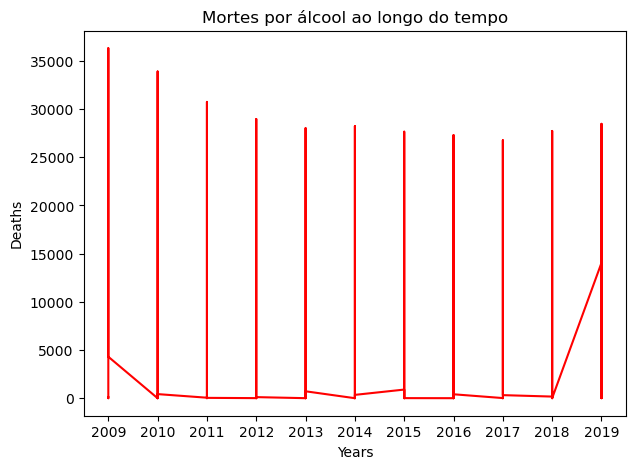

In [80]:
#tamanho da figura:
plt.figure(figsize = (7,5))

#define X, Y, tipo de marcador e cor:
graph = df_final.sort_values(by='Year')
x = graph['Year']
y = graph['Alcohol Use Disorders']
plt.xticks(range(2009, 2020))
plt.plot(x,y, marker = '', color = 'red')

#define título:
plt.title('Mortes por álcool ao longo do tempo')

#define nome a mostrar no eixo x:
plt.xlabel('Years')

#define nome a mostrar no eixo y:
plt.ylabel('Deaths')

#faz a plotagem
plt.show()